In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Работа с данными

## Описание переменных

### данные банковского клиента
| Название | Тип данных | Описание |
| ----------- | ----------- | ----------- |
| age | numeric | возраст |
| job | categorical | текущая работа |
| marital | categorical | семейное положение |
| education | categorical | образование |
| default | categorical | имеет ли кредит по умолчанию? |
| housing | categorical | есть ли жилищный кредит? |
| loan | categorical | есть ли личный кредит? |

### связано с последним контактом текущей кампании 
| Название | Тип данных | Описание |
| ----------- | ----------- | ----------- |
| contact | categorical | тип контактной связи |
| month | categorical | последний месяц контакта в году |
| day_of_week | categorical | последний контактный день недели |
| duration | numeric | продолжительность последнего контакта, в секундах (числовое значение). Важное примечание: этот атрибут сильно влияет на целевой результат вывода (например, если длительность=0, то y="нет"). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные следует включать только для целей сравнения и их следует отбросить, если предполагается создать реалистичную прогностическую модель. |

### другие атрибуты
| Название | Тип данных | Описание |
| ----------- | ----------- | ----------- |
| campaign | numeric | количество контактов, выполненных в ходе этой кампании и для данного клиента |
| pdays | numeric | количество дней, прошедших после того, как с клиентом в последний раз связывались в рамках предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались) |
| previous | numeric | количество контактов, выполненных до этой кампании и для данного клиента |
| poutcome | categorical | результат предыдущей маркетинговой кампании |

### атрибуты социального и экономического контекста
| Название | Тип данных | Описание |
| ----------- | ----------- | ----------- |
| emp.var.rate | numeric | коэффициент вариации занятости - квартальный показатель |
| cons.price.idx | numeric | индекс потребительских цен - месячный показатель |
| cons.conf.idx | numeric | индекс доверия потребителей - месячный показатель |
| euribor3m | numeric | ставка euribor за 3 месяца - ежедневный показатель |
| nr.employed | numeric | численность работников - квартальный показатель |

### Выходная переменная (желаемая цель)
| Название | Тип данных | Описание |
| ----------- | ----------- | ----------- |
| y | binary | зарегистрировал ли клиент срочный депозит? |

In [2]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

labeled samples: 25


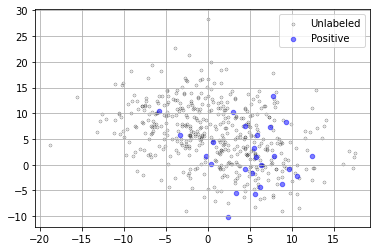

In [5]:
from sklearn.datasets import make_blobs

N = 500
known_labels_ratio = 0.1
X, y = make_blobs(n_samples=N, centers=2, 
                  n_features=2, shuffle=True, 
                  cluster_std=5, random_state=42)
rp = np.random.permutation(int(N/2))
data_P = X[y==1][rp[:int(len(rp)*known_labels_ratio)]]
data_U = np.concatenate((X[y==1][rp[int(len(rp)*known_labels_ratio):]], X[y==0]), axis=0)
print("labeled samples: %d" % (data_P.shape[0]))
#plt.figure(figsize=(5, 2))
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', marker='.', linewidth=3, s=1, alpha=0.5, label='Unlabeled')
plt.scatter(data_P[:, 0], data_P[:, 1], c='b', marker='o', linewidth=1, s=20, alpha=0.5, label='Positive')
plt.grid()
plt.legend();

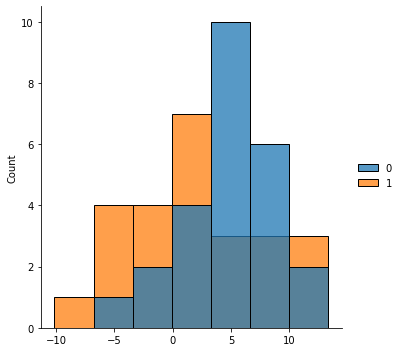

In [11]:
sns.displot(data_P);

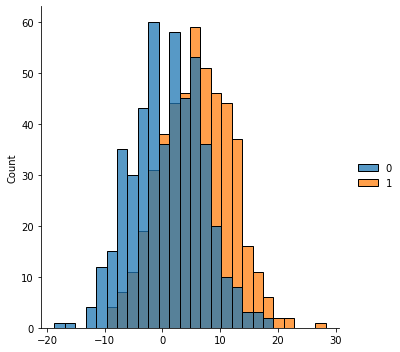

In [10]:
sns.displot(data_U);